# Simple example combining NetCDF datasets from different NCI Collections

### Load python packages
- We need `netCDF4` to work with the netCDF files
- `numpy` for array manipulation
- `matplotlib.pyplot` for plotting
- `pyproj` for coordinate reference transformations

In [1]:
from netCDF4 import Dataset
import numpy as np
import pyproj
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
path = '/g/data2/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc'

In [3]:
f = Dataset(path)

In [4]:
# Read variables (but not yet extract)
band2 = f['band_2']
y = f['y']
x = f['x']
t = f['time']

In [5]:
t1 = 9
band4 = f['band_4'][t1,:,:]
band6 = f['band_6'][t1,:,:]
band7 = f['band_7'][t1,:,:]

In [6]:
b4 = band4.clip(0, 6000) / 6000. * 255
b6 = band6.clip(0, 6000) / 6000. * 255
b7 = band7.clip(0, 6000) / 6000. * 255


rgb = np.stack((b7, b6, b4), axis=2).astype('uint8')

print "New array shape: {0}, dtype: {1}".format(rgb.shape, rgb.dtype)

New array shape: (4000, 4000, 3), dtype: uint8


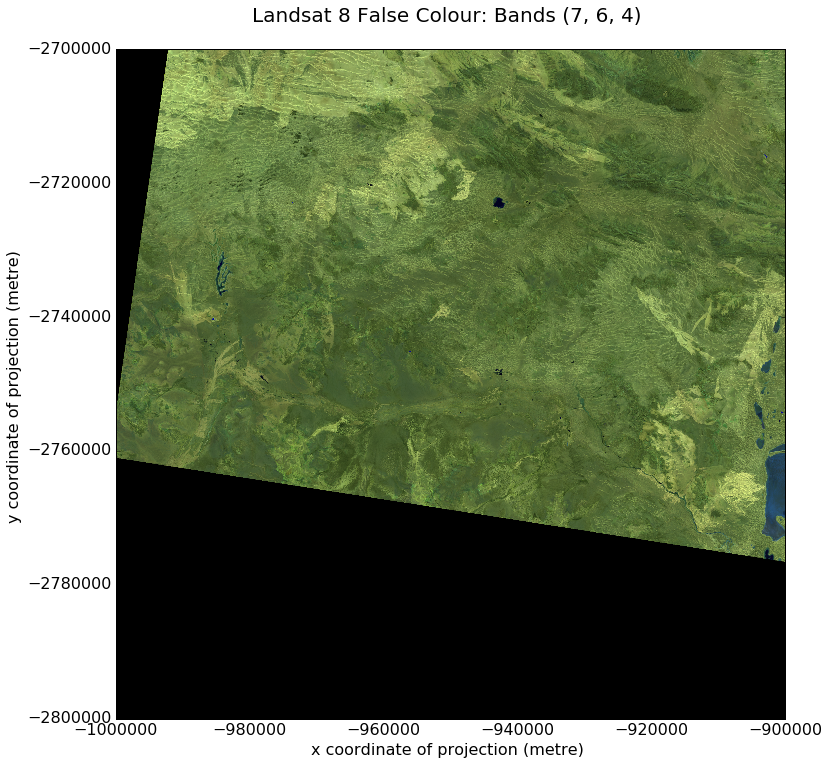

In [7]:
# Set figure size
plt.figure(figsize=(12,12))

# Plot image
plt.imshow(rgb, extent=[x[0], x[-1], y[-1], y[0]])

# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title('Landsat 8 False Colour: Bands (7, 6, 4) \n', fontsize=20)
plt.xlabel(x.long_name+' ('+x.units+') ', fontsize=16)
plt.ylabel(y.long_name+' ('+y.units+') ', fontsize=16)


# Adjust tick mark size
plt.tick_params(labelsize=16)

In [8]:
epsg3577 = pyproj.Proj(init="epsg:3577")
epsg4326 = pyproj.Proj(init="epsg:4326")

In [9]:
lon, lat = pyproj.transform(epsg3577, epsg4326, x[:], y[:])

In [10]:
f2 = Dataset('/g/data1/rr2/National_Coverages/IR_gravity_anomaly_Australia_V1/IR_gravity_anomaly_Australia_V1.nc')

In [11]:
grav = f2.variables['grav_ir_anomaly']
lon_IR = f2.variables['lon']
lat_IR = f2.variables['lat']

In [12]:
from scipy.interpolate import interp2d

f = interp2d(lon_IR[:], lat_IR[:], grav, kind='linear')
grav_intp = f(lon, lat)

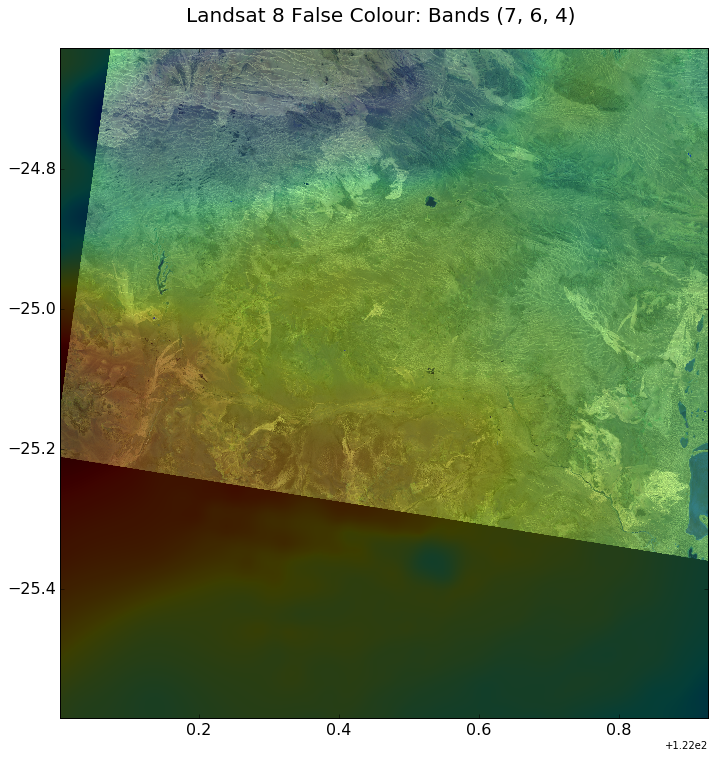

In [13]:
# Set figure size
plt.figure(figsize=(12,12))



# Plot images
ax1 = plt.imshow(rgb, extent=[lon[0], lon[-1], lat[-1], lat[0]])


plt.title('Landsat 8 False Colour: Bands (7, 6, 4) \n', fontsize=20)


ax2 = plt.imshow(grav_intp, extent=[lon[0], lon[-1], lat[-1], lat[0]], alpha=.25)


# Adjust tick mark size
plt.tick_params(labelsize=16)